In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

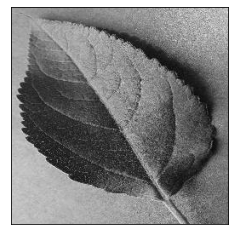

In [16]:
img = cv2.imread('/content/drive/MyDrive/IBM/Data Set/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/011d02f3-5c3c-4484-a384-b1a0a0dbdec1___RS_HL 7544.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## 1-Histogram of an image

Text(0, 0.5, 'Frequency')

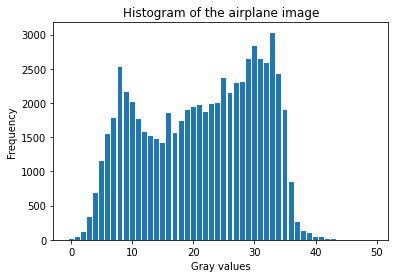

In [11]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

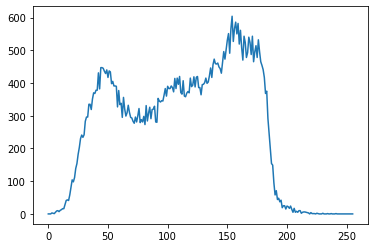

In [12]:
# Another method
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

Let's look at another example.

In [17]:
# Let's read two other images
high = cv2.imread('/content/drive/MyDrive/IBM/Data Set/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/013b7c70-5e3b-42b7-86af-167815a5b04f___RS_HL 7480.JPG')
low = cv2.imread('/content/drive/MyDrive/IBM/Data Set/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/011d02f3-5c3c-4484-a384-b1a0a0dbdec1___RS_HL 7544.JPG')

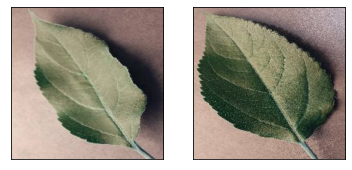

In [18]:
# show images
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

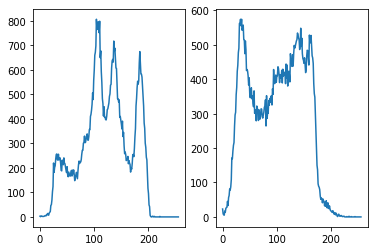

In [19]:
# Calculate histogram of both images for the last channel.
# Channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

## 2-Cumulative histogram of an image

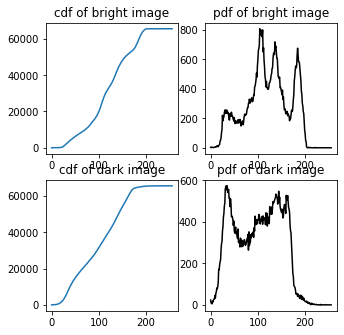

In [20]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')

# adjust the placement of subplots
plt.subplots_adjust(bottom=2, right=0.8, top=3)

plt.show()

## 3-Histogram manipulation

In [21]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

In [ ]:
# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

### 3-1 Brightness

In [23]:
# Define a function to easily handle manipulation.
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(image.shape, image.dtype)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image

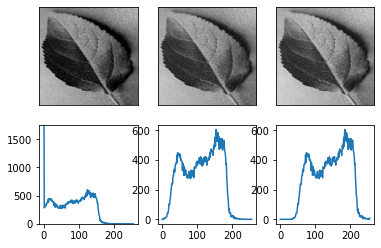

In [24]:
# Test on the image
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

([<matplotlib.lines.Line2D at 0x7fb830efd510>], (0.0, 1100.0))

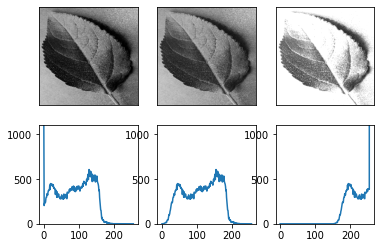

In [25]:
# Test on the dark image
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])), plt.ylim((0, 1100))

### 3-2 Contrast

(0.0, 1750.0)

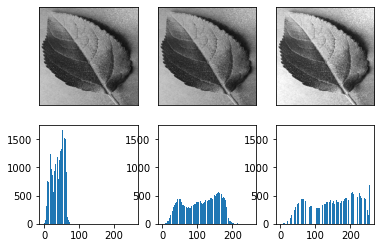

In [26]:
# Test on the image
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

## Histogram equalization

<BarContainer object of 256 artists>

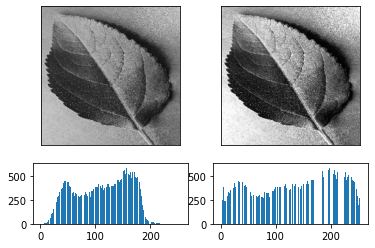

In [27]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())


### CLAHE (Contrast Limited Adaptive Histogram Equalization)

<BarContainer object of 256 artists>

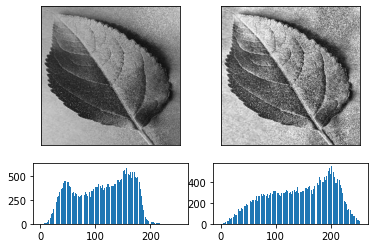

In [28]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_cl, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_cl],[0],None,[256],[0,256]).ravel())